In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
dm = pd.read_csv('C:/Users/b01297ar/Documents/ProstateMRL-local/ProstateMRL-Radiomics/Paper1-Release/Output/Submission/DM/data/653.csv')
sel_fts = pd.read_csv('../Output/Submission/features/Features_Selected.csv')
sel_fts = sel_fts['Feature'].values

dm.reset_index()
dm.rename(columns={'Unnamed: 0':'Feature'}, inplace=True)
dm = dm[dm['Feature'].isin(sel_fts)]

dm = dm.set_index('Feature')
dm = dm[sel_fts]

print(dm.shape)

dm_vals = dm.values
dm



(13, 13)


,glcm_JointEnergy,glcm_Correlation,glrlm_HighGrayLevelRunEmphasis,firstorder_Mean,gldm_GrayLevelVariance,gldm_HighGrayLevelEmphasis,glcm_JointAverage,glcm_ClusterShade,firstorder_Median,gldm_LargeDependenceLowGrayLevelEmphasis,glcm_JointEntropy,glcm_Imc2,glrlm_LongRunEmphasis
Feature,,,,,,,,,,,,,
firstorder_Mean,1.322120,0.825590,0.165399,0.000000,0.235507,0.187817,0.028516,0.325105,0.063129,0.982897,0.231487,0.840644,1.360545
firstorder_Median,1.320332,0.853896,0.179550,0.063129,0.256017,0.194438,0.060853,0.325771,0.000000,1.008482,0.289078,0.870833,1.361430
glcm_ClusterShade,1.546693,1.098765,0.166300,0.325105,0.129651,0.145480,0.298067,0.000000,0.325771,1.132164,0.427187,1.117374,1.604014
glcm_Correlation,0.828375,0.000000,0.958899,0.825590,0.986634,0.987975,0.851514,1.098765,0.853896,0.560360,0.733503,0.089024,0.765040
glcm_Imc2,0.903969,0.089024,0.973358,0.840644,1.001287,1.002451,0.866620,1.117374,0.870833,0.625406,0.737683,0.000000,0.826711
glcm_JointAverage,1.343058,0.851514,0.139110,0.028516,0.212193,0.160407,0.000000,0.298067,0.060853,0.998937,0.242850,0.866620,1.383028
glcm_JointEnergy,0.000000,0.828375,1.448256,1.322120,1.482008,1.470213,1.343058,1.546693,1.320332,0.777795,1.338400,0.903969,0.232202
glcm_JointEntropy,1.338400,0.733503,0.287038,0.231487,0.298631,0.314262,0.242850,0.427187,0.289078,0.896876,0.000000,0.737683,1.360624
glrlm_HighGrayLevelRunEmphasis,1.448256,0.958899,0.000000,0.165399,0.084491,0.030691,0.139110,0.166300,0.179550,1.056693,0.287038,0.973358,1.493731


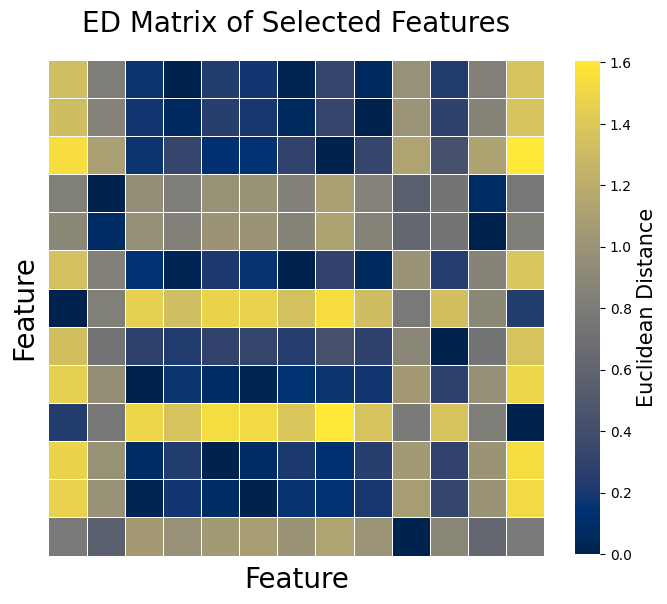

In [49]:
# plot the heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(dm_vals, cmap='cividis', square=True, annot=False, cbar=True, cbar_kws={'shrink': 0.8, 'label': 'Euclidean Distance'}, edgecolor='black', linewidth=0.5)
# change fontsize of colorbar title
plt.gcf().axes[-1].yaxis.label.set_size(15)

plt.title('ED Matrix of Selected Features', fontsize=20, pad=20)
plt.xlabel('Feature', fontsize=20)
plt.ylabel('Feature', fontsize=20)

plt.xticks([])
plt.yticks([])

plt.savefig('C:/Users/b01297ar/Documents/ProstateMRL-local/ProstateMRL-Radiomics/Paper1-Release/Output/Submission/DM/ED_Selected_Features.png', dpi=300)